[极客教程-sympy](https://geek-docs.com/python/python-tutorial/python-sympy.html)

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
%matplotlib inline

In [2]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import sys
import random

In [168]:
from sympy import pi, E, I

In [12]:
from sympy import simplify

# 符号计算

## 定义符号和符号运算
* Symbol
* symbols

In [4]:
from sympy import Symbol,symbols

In [5]:
x = Symbol('x')
a = Symbol('x')
x
2*x+1
2*a+1

x

2*x + 1

2*x + 1

In [6]:
x,y,z=symbols("x y z") # 要以空格或逗号分隔
x
y
z

x

y

z

### 使用表达式

In [7]:
x,y=symbols("x y")

#### 分解和展开表达式
* fractor(): 分解表达式
* expand(): 展开表达式

In [8]:
from sympy import factor,expand
expr = x**2-y**2
factors = factor(expr)
factors
expand(factors)

(x - y)*(x + y)

x**2 - y**2

#### 使表达式整齐输出
* pprint()

In [9]:
from sympy import pprint
expr = x*x+2*x*y+y*y
expr
pprint(expr)

x**2 + 2*x*y + y**2

 2            2
x  + 2⋅x⋅y + y 


In [10]:
from sympy import init_printing
expr = 1+2*x+2*x**2
# pprint(expr)
init_printing(order="grlex") # 有问题，没什么作用
pprint(expr)

   2          
2⋅x  + 2⋅x + 1


### 级数

### 用值代替符号
* subs()

In [200]:
x, y = symbols('x y')

type(x)
expr = 3*x*x+2*x*y+y*y
expr1 = expr.subs({x:(1-y)})
expr.subs({x:2, y:3})

(1/x).evalf(subs={x: 0.3}, n=21) # n 总位数，精度不够
# (1/x).subs({x: 3.0})
# (1/x).subs({x: 3.0}, n=21)# 位数不足，与上面相同
# (1/x).subs({x: 3.0}).evalf(21)# 不好
expr1
simplify(expr1)


sympy.core.symbol.Symbol

### 将字符串转化为数学表达式
* simplify()  
    * 简化表达式
    * 将字符串转化为数学表达式

In [14]:
expr_str = "3*x*x+2*x*y+y*y"
expr = simplify(expr_str)
expr

### 表达式乘法

In [15]:
expr1 = x**2+2*x
expr2 = x**3+2*x**2+3*x
expr = expr1*expr2
expr
simplify(expr)
expand(expr)

## 运算符

In [163]:
from sympy import summation, factorial

In [173]:
n = symbols('n')
# 求和
s = summation(1 / factorial(n), (n, 1, 100))
s.evalf()
# print(s.evalf())
# 阶乘
a = factorial(5)
# print(a)
'''
evalf'''
a = sympy.Symbol('a')
(1 / a).evalf(subs={a: 3}, n=10)
# print((1 / a).evalf(subs={a: 3}, n=10))  # 值代换，保留小数位数

# 欧拉公式和复数
# E**(I*pi) + 1
x = symbols("x", real=True)
y = expand(E ** (I * x), complex=True)


'\nevalf'

# 函数

## 分段函数
* Piecewise

In [87]:
from sympy import Piecewise, pi
x = symbols('x')

⎧x   for x > -1 ∧ x < 1
⎨                      
⎩-x  for x > 1 ∨ x < -1

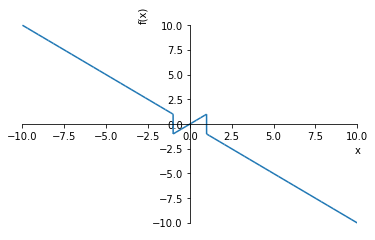

In [127]:
f = Piecewise((x,(x>-1) & (x<1)),(-x,(x<-1) | (x>1))) 
f
plot(f)

⎧x   for x > -1 ∧ x < 1
⎨                      
⎩-x  for x > -3 ∧ x < 0

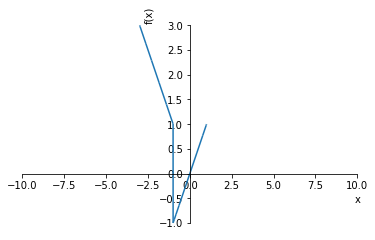

In [144]:
f = Piecewise((x,(x>-1) & (x<1)),(-x,(x<0) & (x>-3))) # 区间有重叠不报错，但不对
f
plot(f)


In [139]:
f = Piecewise((1,x>0),(0,(x>=0) & (x<=0)),(-1,x<0)) # ==无效，改用集合交集表示
# f = Piecewise((1,x>0),(0,(x==0)),(-1,x<0)) # ==无效
f
# plot(f) # 带有一个点的分段函数无法这样plot
f.subs({x:0})

⎧1   for x > 0
⎪             
⎨0   for x = 0
⎪             
⎩-1  for x < 0

⎧0   for x < -1
⎪              
⎪ x            
⎨ℯ   for x ≤ 1 
⎪              
⎪x   otherwise 
⎩              

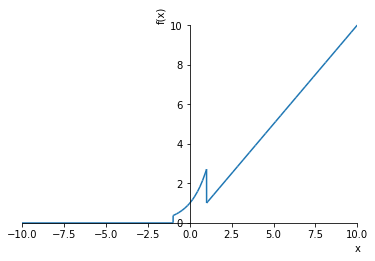

In [158]:
from sympy import sqrt
f = x
# g = log(x) # 无法plot
g = exp(x)
p = Piecewise((0, x < -1), (g, x <= 1), (f, True)) # True代表otherwise
p
plot(p)

## 解方程

In [16]:
from sympy import solve
x, y, a, b, c = symbols("x y a b c")
expr = x**2-4
solve(expr)

### 解二次方程

In [17]:
x, y, a, b, c = symbols("x y a b c")
expr = x**2-4*x+3
solve(expr,dict=True)

### 用其它变量求解一个变量

[{x: (b - sqrt(-4*a*c + b**2))/(2*a)}, {x: (b + sqrt(-4*a*c + b**2))/(2*a)}]


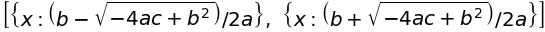

In [18]:
expr = a*x**2-b*x+c
result = solve(expr,x,dict=True)
print(result)
result # pprint

### 解线性方程组

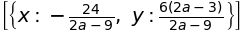

In [19]:
expr1= a*x+3*y-6
expr2 = 3*x+2*y-12
solve((expr1,expr2),(x,y),dict=True)

## sympy包绘图

### 单函数图形绘制

In [20]:
from sympy.plotting import plot
x = Symbol('x')

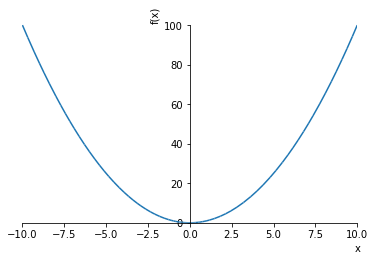

In [21]:
plot(x**2)

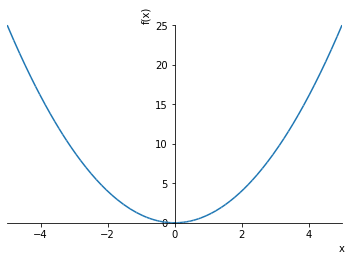

In [22]:
y = x**2
plot(y,(x,-5,5))

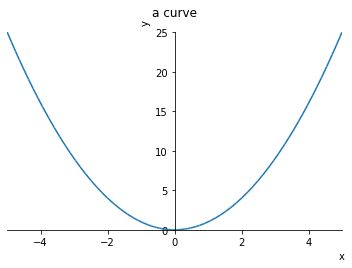

In [23]:
plot(y,(x,-5,5), title="a curve",xlabel="x",ylabel="y",show=True)

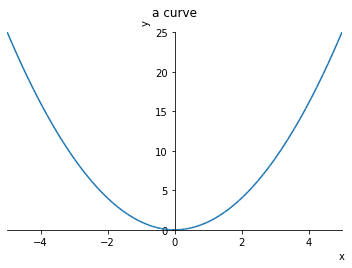

In [24]:
# 保存
p = plot(y,(x,-5,5), title="a curve",xlabel="x",ylabel="y",show=False)
p.save(r"./saves/curve.png")

### 多函数图形绘制

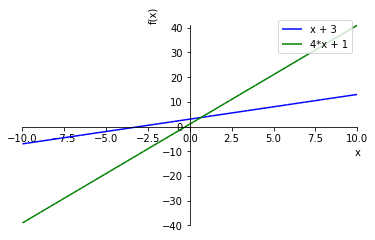

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_dim',
 'adaptive',
 'depth',
 'end',
 'expr',
 'flag',
 'get_color_array',
 'get_points',
 'get_segments',
 'is_2Dline',
 'is_3D',
 'is_3Dline',
 'is_3Dsurface',
 'is_contour',
 'is_implicit',
 'is_line',
 'is_parametric',
 'label',
 'line_color',
 'nb_of_points',
 'only_integers',
 'start',
 'steps',
 'var',
 'xscale']

In [25]:
p = plot(x+3,4*x+1,legend=True,show=False)
p[0].line_color='b'
p[1].line_color='g'
p.show()
# dir(p)
dir(p[0]) # 查看对象属性

In [26]:
from sympy import log,exp,power

log 不能作图

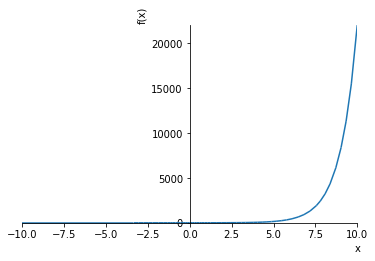

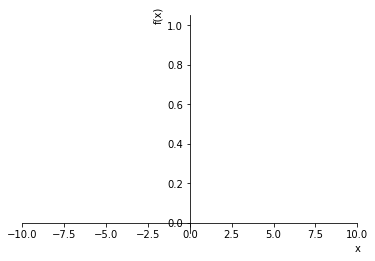

In [27]:
log(x)
plot(exp(x))
plot(log(x))

In [28]:
solve(log(x)-4)

### 级数求和
* summation

In [29]:
from sympy import summation
x,n,s= symbols("x n s")
s = summation(x**n/n,(n,1,5))
s
s.subs({x:1})

### 解单变量不等式


In [32]:
from sympy import Poly, solve_poly_inequality
ineq_obj = -x**2+4<0
# dir(inen_obj)
lhs = ineq_obj.lhs
rel = ineq_obj.rel_op
p = Poly(lhs, x)
p
lhs
rel
solve_poly_inequality(p,rel)

'<'

In [33]:
from sympy import Poly, solve_rational_inequalities
ineq_obj = ((x-1)/(x+2))>0
# dir(inen_obj)
lhs = ineq_obj.lhs
numer,denom = lhs.as_numer_denom()
p1 = Poly(numer)
p2 = Poly(denom)
rel = ineq_obj.rel_op
lhs
rel
p1
p2
solve_rational_inequalities([[((p1,p2),rel)]])

'>'

In [34]:
from sympy import solve_univariate_inequality, sin
x = Symbol('x')
ineq_obj = sin(x) - 0.6 > 0
solve_univariate_inequality(ineq_obj, x, relational=False)

In [35]:
x = Symbol('x')
# is_polynomial()函数可用于检查表达式是否为多项式
expr1 = x**2 - 4
expr1.is_polynomial()
# is_rational_function()函数可以用来检查表达式是否为有理式
expr2 = (2+x)/(3+x)
expr2.is_rational_function()
# simpify()函数可以将字符串形式的不等式转换为一个不等式对象
simplify("x+3>0")

True

True

# 微积分

* Symbol
    * {'commutative': True, 'complex': True, 'hermitian': True, 'imaginary': False, 'negative': False, 'nonnegative':True, 'nonpositive': False, 'nonzero': True, 'positive': True, 'real': True, 'zero': False} 
    

In [36]:
x = Symbol('x',positive=True)
x>0

True

## 极限

In [37]:
from sympy import limit, Limit, S, oo
x = Symbol('x')
limit(1/x,x,+oo,dir='-')
L = Limit(1/x,x,S.Infinity,dir='-')
L
L.doit()

# S.Infinity和oo都为正无穷

###### 连续复利

In [40]:
n = Symbol('n')
limit((1+1/n)**n,n,oo)
E1 = Limit((1+1/n)**n,n,oo)
e1 = E1.doit()
E1
e1
sympy.E

In [41]:
p, r, t = symbols('p r t',positive=True)
limit(p*(1+r/n)**(n*t), n, oo)

## 函数求导
* diff()
* Derivative

In [42]:
from sympy import diff, Derivative

In [43]:
x,y = symbols('x y')

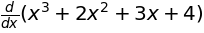

In [44]:
z = x**3+2*x**2+3*x+4
d = Derivative(z,x)
d
d.doit()
d.doit().subs({x:1})
diff(z,x)

#### 求偏导数

In [45]:
z = x**2+2*x*y+3*y**2
d = Derivative(z,x)
d
d.doit()
d.doit().subs({x:1})
d.doit().subs({x:1,y:2})
diff(z,x)
diff(z,y)

#### 高阶导数

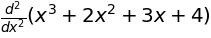

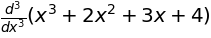

In [46]:
z = x**3+2*x**2+3*x+4
diff(z,x,2)
diff(z,x,3)
Derivative(z,x,2)
Derivative(z,x,3)
Derivative(z,x,2).doit()
Derivative(z,x,3).doit()

#### 最值

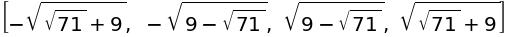

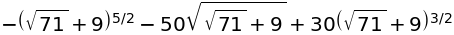

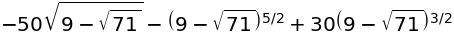

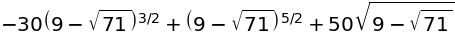

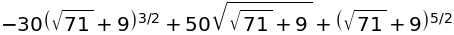

In [47]:
z = x**5-30*x**3+50*x
x_min = -5
x_max = -5
d1 = diff(z,x)
s1 = solve(d1)
s1 = sorted(s1)
s1
z.subs({x:s1[0]})
z.subs({x:s1[1]})
z.subs({x:s1[2]})
z.subs({x:s1[3]})
z.subs({x:s1[0]}).evalf()
z.subs({x:s1[1]}).evalf()
z.subs({x:s1[2]}).evalf()
z.subs({x:s1[3]}).evalf()

## 积分
* Integral
* integrate

In [76]:
from sympy import integrate, Integral

In [77]:
x,y,z = symbols('x y z')

### 不定积分

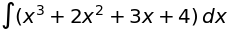

In [50]:
f = x**3+2*x**2+3*x+4
integrate(f, x)
Integral(f, x)
Integral(f, x).doit()

### 定积分

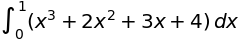

In [51]:
f = x**3+2*x**2+3*x+4
integrate(f,(x,0,1))
Integral(f,(x,0,1))
Integral(f,(x,0,1)).doit()

### 二重积分

##### 二重不定积分

In [83]:
f = x+y
integrate(f, x, y)
integrate(f, x, x)
# Integral(f, (x, -oo, oo), (y, -oo, oo)).doit()

##### 二重定积分


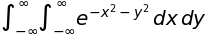

In [52]:
f = exp(-x**2 - y**2)
integrate(f, (x, -oo, oo), (y, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo)).doit()

### 三重积分

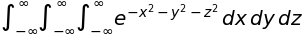

In [53]:
f = exp(-x**2 - y**2 - z**2)
integrate(f, (x, -oo, oo), (y, -oo, oo), (z, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo), (z, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo), (z, -oo, oo)).doit()

### 概率密度

⎧   2                   
⎪3⋅x                    
⎪────  for x ≥ 1 ∧ x ≤ 2
⎨ 7                     
⎪                       
⎪ 0        otherwise    
⎩                       

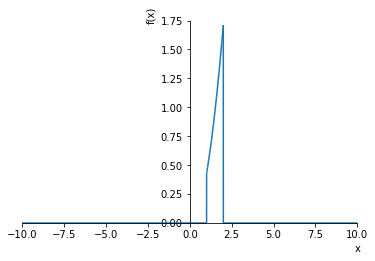

In [125]:
i1 = integrate(x**2,(x,1,2))
f = Piecewise(((1/i1)*x**2,(x>=1) & (x<=2)),(0, True))
f
integrate(f,(x,-oo,oo))
plot(f)

# 集合
FiniteSet

### 构建集合

In [54]:
from sympy import FiniteSet
from fractions import Fraction # 分数

In [55]:
s = FiniteSet(2,4,6, Fraction(1,5))
s
len(s)
3 in s

False

In [56]:
# 创建一个空集合
s = FiniteSet()
s

In [57]:
# 通过列表或元组创建集合
members= [1,2,3]
s = FiniteSet(*members)
s

##### 集合的重复与排序

In [58]:
s = FiniteSet(2,4,6,2)
s
for s_ in s:
    print(s_)

2
4
6


In [59]:
s1 = FiniteSet(2,4,6)
s2 = FiniteSet(6,4,2)
s1 == s2

True

### 子集、超集与幂集
* 子集: is_subset()
* 超集: is_superset()
* 幂集: powerset()

In [60]:
s = FiniteSet(1)
t = FiniteSet(1,2,3,4)
# 子集
s.is_subset(t)
t.is_subset(s)
# 超集
s.is_superset(t)
t.is_superset(s)
# 幂集
ps = t.powerset()
ps
len(ps)
# 真子集
s.is_proper_subset(t)
# 真超集
t.is_proper_superset(s)

True

False

False

True

True

True

### 集合运算
* 并集和交集  
    * union
    * intersection
* 笛卡尔积
    * *(乘法运算符号)

##### 并集和交集

In [61]:
s = FiniteSet(1,2,3)
t = FiniteSet(2,4,6)
u = FiniteSet(3,5,7)
s.union(t)
s.intersection(t)
# 三个集合的并集
s.union(t).union(u)

##### 笛卡尔积

In [62]:
s = FiniteSet(1,2)
t = FiniteSet(3,4)
p = s*t
p
len(p)
for p_ in p:
    print(p_)

(1, 3)
(1, 4)
(2, 3)
(2, 4)


##### 集合与自身的笛卡尔乘积

In [63]:
s = FiniteSet(1,2)
p = s**3
p
len(p)
for p_ in p:
    print(p_)

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(2, 1, 1)
(2, 1, 2)
(2, 2, 1)
(2, 2, 2)


In [109]:
from sympy import pi
def time_period(length,g):
    T = 2*pi*(length/g)**0.5
    return T
if __name__=='__main__':
    L = FiniteSet(15,18,21,22.5,25)
    g_values = FiniteSet(9.8,9.78,9.83)
    for elem in L*g_values:
        l = elem[0]
        g = elem[1]
        t = time_period(l/100,g)
        print('{0:^15}{1:^15}{2:^15.3f}'.format(float(l),float(g),float(t)))


     15.0           9.78           0.778     
     15.0            9.8           0.777     
     15.0           9.83           0.776     
     18.0           9.78           0.852     
     18.0            9.8           0.852     
     18.0           9.83           0.850     
     21.0           9.78           0.921     
     21.0            9.8           0.920     
     21.0           9.83           0.918     
     22.5           9.78           0.953     
     22.5            9.8           0.952     
     22.5           9.83           0.951     
     25.0           9.78           1.005     
     25.0            9.8           1.004     
     25.0           9.83           1.002     


# 概率

* 均匀分布
    * random.uniform
    * np.random.uniform

###### 估计一个圆的面积

In [65]:
N=0
M=100000
for i in range(M):
    x1 = random.uniform(-1,1)
    y1 = random.uniform(-1,1)
    r1 = x1**2+y1**2
    if r1<=1 :
        N+=1
(N/M)*4

### 文氏图
pip install matplotlib-venn

In [66]:
from matplotlib_venn import venn2,venn2_circles

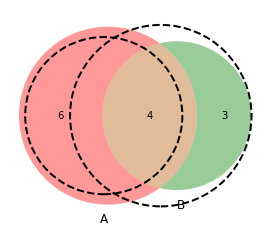

In [67]:
s1 = FiniteSet(*range(1,20,2))
s2 = FiniteSet(*range(1,20,3))
s1
s2
venn2(subsets=[s1,s2], set_labels = ('A', 'B'))
# dir(venn2())
c = venn2_circles(subsets=(1, 2, 2), linestyle='dashed')

### random
* random.shuffle() 方法将序列的所有元素随机排序。
* random.choice() 方法返回一个列表，元组或字符串的随机项。

In [80]:
x1 = list(range(10))
# 复制列表
y1 = x1[:]
z1 = x1.copy()
random.shuffle(x1)
x1
len(x1)
y1
z1
random.choice(x1)

#### 洗牌
* random.shuffle()

In [69]:
# 牌类
class Card:
    def __init__(self,suit,rank):
        self.suit = str(suit)
        self.rank = int(rank)


In [70]:
# 设定牌
suits = FiniteSet(*"ABCD")
suits
ranks = FiniteSet(*range(1,14))
ranks
cards = suits*ranks
cards

In [71]:
cardlist=[]
for i,card in enumerate(cards):
    cardlist.append(Card(card[0],card[1]))

In [72]:
# 洗牌
random.shuffle(cardlist)
# cardlist

### 类列表按属性排序
operator

In [73]:
# 理牌
import operator
cardlist1 = cardlist[:13]
cmpfun = operator.attrgetter('rank')#参数为排序依据的属性，可以有多个，这里优先id，使用时按需求改换参数即可
cardlist1.sort(key=cmpfun)#使用时改变列表名即可
for l1 in cardlist1:
    "{0}{1}".format(l1.suit,l1.rank)

'A2'

'A3'

'B3'

'C3'

'D6'

'B6'

'D8'

'B8'

'D9'

'C10'

'A10'

'C11'

'D13'